In [48]:
# Importing all the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error

### Data Collection

In [2]:
path = 'https://raw.githubusercontent.com/MuskanKhandelia/Toyota_Corolla_Price_Prediction/main/ToyotaCorolla.csv'
data = pd.read_csv(path,encoding='latin1')
original_data = data.copy()
data = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Data Preparation

#### Data Cleaning

In [3]:
data.shape

(1436, 9)

This means that this dataset has 1436 rows and 9 columns.

In [4]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [5]:
data.rename(columns = {'Age_08_04':'Age','cc':'CC'},inplace = True)

In [6]:
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


There is 1 duplicate record in the dataset.

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age            1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   CC             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


There are no null values and no categorical values in the dataset. 

In [9]:
data.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


#### Data Analysis & Visualization 

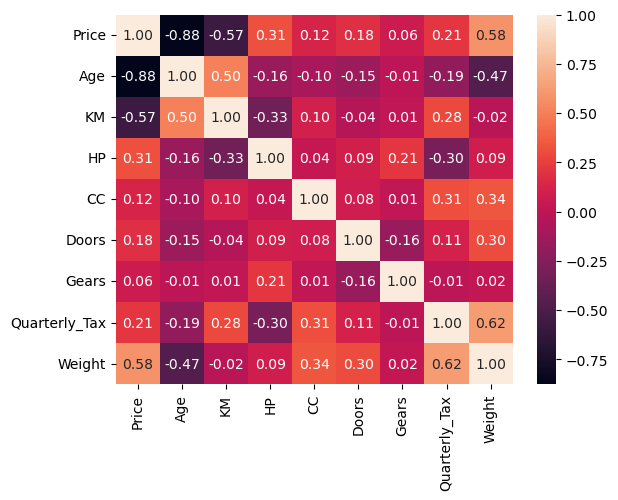

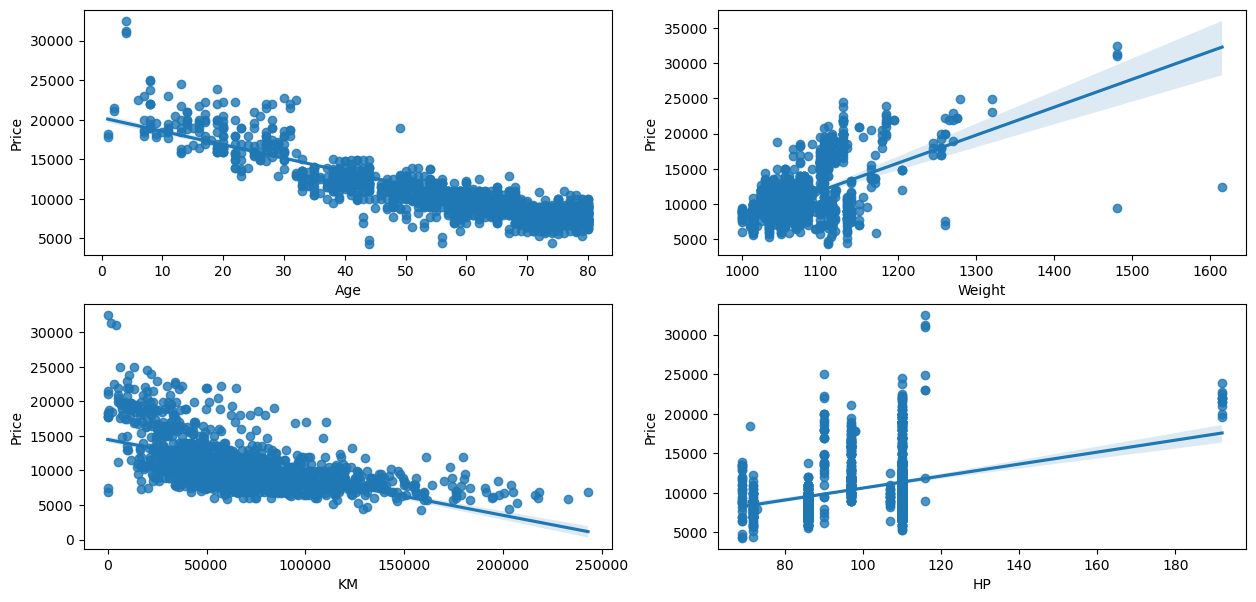

In [10]:
corr = data.corr()
sns.heatmap(data = corr,annot = True,fmt = '.2f')

fig, axs = plt.subplots(2,2, figsize=(15, 7))

sns.regplot(x = 'Age', y = 'Price', data = data, ax = axs[0,0])
sns.regplot(x = 'Weight', y = 'Price', data = data, ax = axs[0,1])
sns.regplot(x = 'KM', y = 'Price', data = data, ax = axs[1,0])
sns.regplot(x = 'HP', y = 'Price', data = data, ax = axs[1,1])

plt.show()

'Age' has a good negative correlation with the target variable 'Price'. 'KM' and 'Weight' are moderately correlated while other variables don't have much correlation with the target variable.

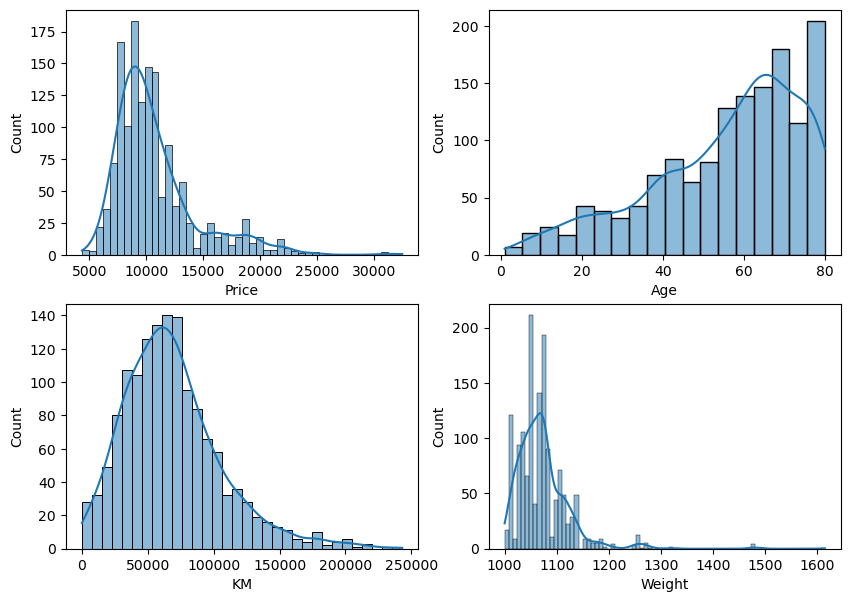

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

sns.histplot(data=data, x='Price', kde=True, ax=axs[0, 0])
sns.histplot(data=data, x='Age', kde=True, ax=axs[0, 1])
sns.histplot(data=data, x='KM', kde=True, ax=axs[1, 0])
sns.histplot(data=data, x='Weight', kde=True, ax=axs[1, 1])

plt.show()

The data is not normally distributed, it is mostly skewed.

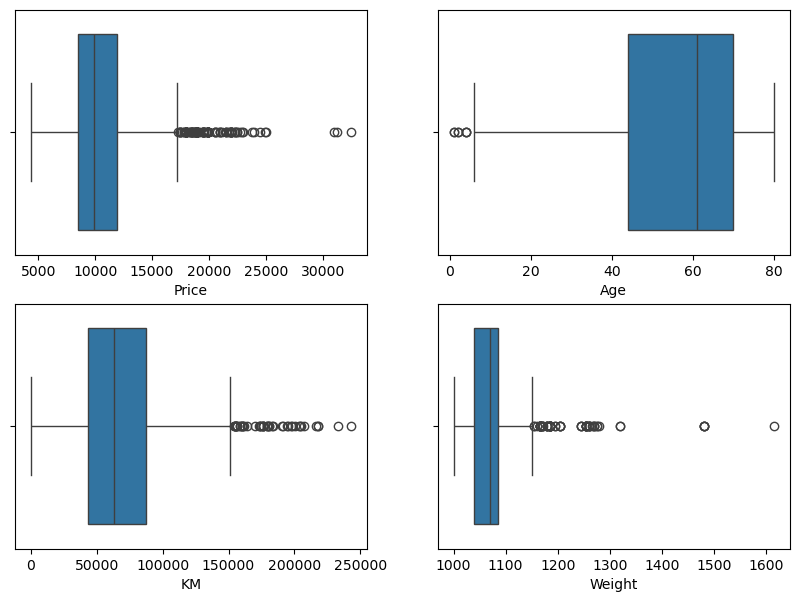

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

sns.boxplot(data=data, x='Price', ax=axs[0,0])
sns.boxplot(data=data, x='Age', ax=axs[0,1])
sns.boxplot(data=data, x='KM', ax=axs[1,0])
sns.boxplot(data=data, x='Weight', ax=axs[1,1])

plt.show()

There are too many outliers in the data. 

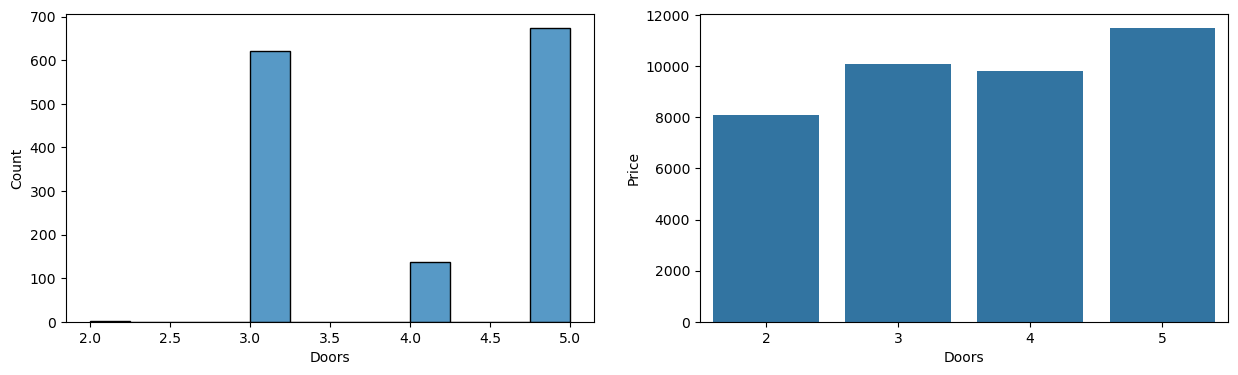

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data = data, x = 'Doors',ax = axs[0])
sns.barplot(x = 'Doors', y = 'Price', data = data, errorbar = None, ax = axs[1])

plt.show()

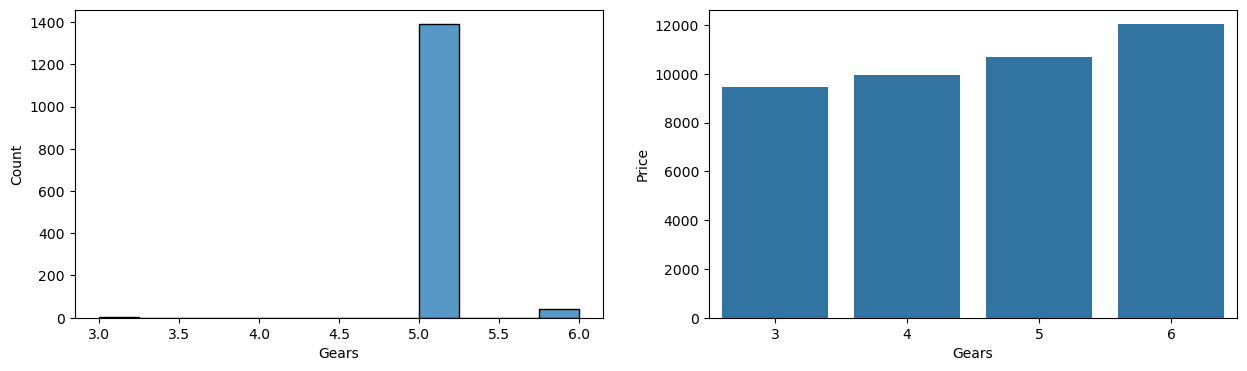

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data = data, x = 'Gears',ax = axs[0])
sns.barplot(x = 'Gears', y = 'Price', data = data, errorbar = None, ax = axs[1])

plt.show()

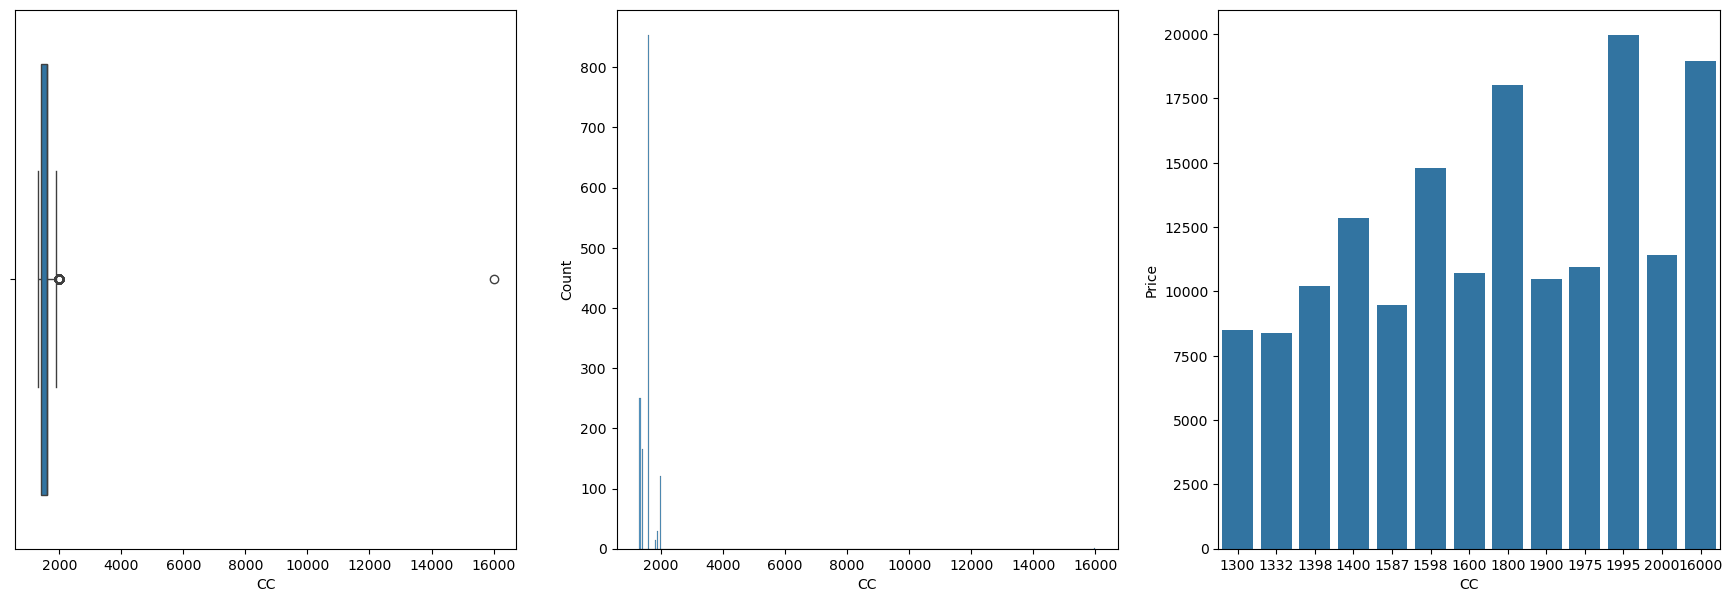

In [160]:
fig, axs = plt.subplots(1, 3, figsize=(22, 7))

sns.boxplot(data = data, x = 'CC',ax = axs[0])
sns.histplot(data = data, x = 'CC',ax = axs[1])
sns.barplot(x = 'CC', y = 'Price', data = data, errorbar = None, ax = axs[2])

plt.show()

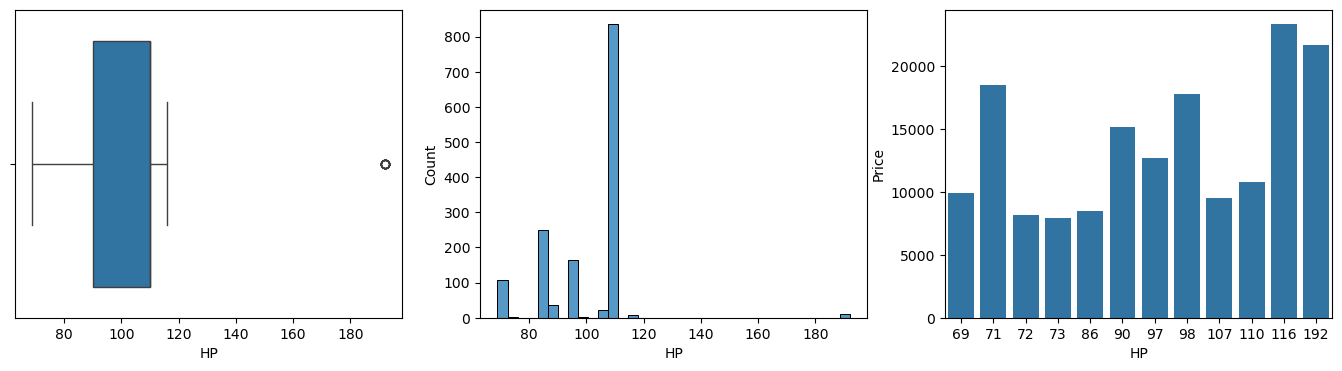

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(17, 4))

sns.boxplot(data = data, x = 'HP',ax = axs[0])
sns.histplot(data = data, x = 'HP',ax = axs[1])
sns.barplot(x = 'HP', y = 'Price', data = data, errorbar = None, ax = axs[2])

plt.show()

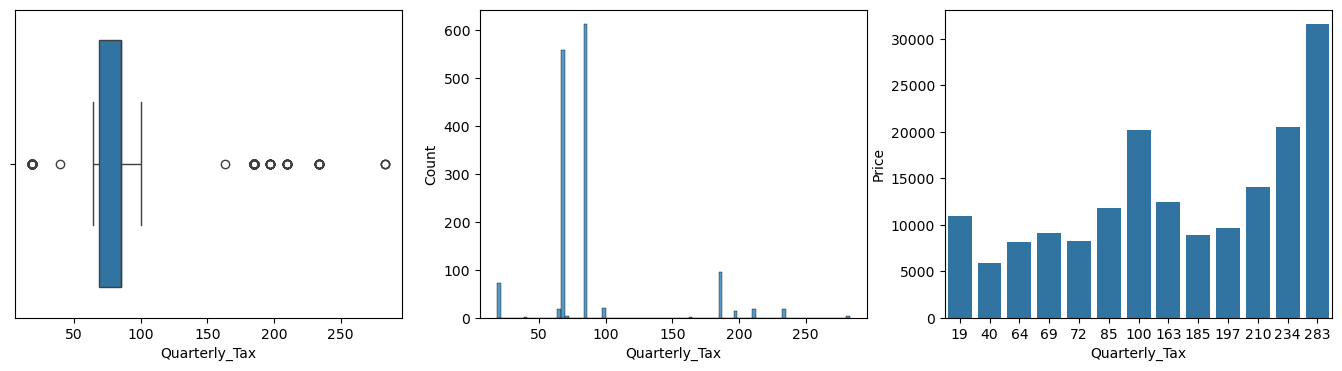

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(17, 4))

sns.boxplot(data = data, x = 'Quarterly_Tax',ax = axs[0])
sns.histplot(data = data, x = 'Quarterly_Tax',ax = axs[1])
sns.barplot(x = 'Quarterly_Tax', y = 'Price', data = data, errorbar = None, ax = axs[2])

plt.show()

### Model Selection - Multiple Linear Regression

### Model building and Training

In [17]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [26]:
X = data[['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
y = data['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1234)

In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [42]:
y_pred_train = lr.predict(X_train) 

print('Training Accuracy is',round(r2_score(y_train,y_pred_train),2))
print('Mean Absolute Error is',round(mean_absolute_error(y_train,y_pred_train),2))

Training Accuracy is 0.86
Mean Absolute Error is 1007.0


In [43]:
y_pred_test = lr.predict(X_test) 

print('Testing Accuracy is',round(r2_score(y_test,y_pred_test),2))
print('Mean Absolute Error is',round(mean_absolute_error(y_test,y_pred_test),2))

Testing Accuracy is 0.86
Mean Absolute Error is 1012.06


The training accuracy is close to the testing accuracy which means that it is a Generalized Model.

### Model Selection - Ridge Regression

### Model building and Training

In [33]:
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

### Model Evaluation

In [44]:
y_pred_train = ridge.predict(X_train) 

print('Training Accuracy is',round(r2_score(y_train,y_pred_train),2))
print('Mean Absolute Error is',round(mean_absolute_error(y_train,y_pred_train),2))

Training Accuracy is 0.86
Mean Absolute Error is 1006.96


In [46]:
y_pred_test = ridge.predict(X_test) 

print('Testing Accuracy is',round(r2_score(y_test,y_pred_test),2))
print('Mean Absolute Error is',round(mean_absolute_error(y_test,y_pred_test),2))

Testing Accuracy is 0.86
Mean Absolute Error is 1011.88


The accuracy is same for Ridge Regression as well.

### Model Selection - Lasso Regression

### Model building and Training

In [38]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

### Model Evaluation

In [45]:
y_pred_train = lasso.predict(X_train) 

print('Training Accuracy is',round(r2_score(y_train,y_pred_train),2))
print('Mean Absolute Error is',round(mean_absolute_error(y_train,y_pred_train),2))

Training Accuracy is 0.86
Mean Absolute Error is 1006.88


In [47]:
y_pred_test = ridge.predict(X_test) 

print('Testing Accuracy is',round(r2_score(y_test,y_pred_test),2))
print('Mean Absolute Error is',round(mean_absolute_error(y_test,y_pred_test),2))

Testing Accuracy is 0.86
Mean Absolute Error is 1011.88


The accuracy of Lasso Regression is also same. 

As the model was not overfitting, we got the same accuracy for all the 3 regression.